# Spline Interpolation Methods

## Madelyn Torres

# Introduction

Spline interpolation is a method which uses low-degree polynomials in order to approximate some function from a limited set of data. Splines are able to smoothly connect different pieces of the resulting graph of the function. This technique avoids issues such as Runge’s phenomenon while maintaining a high degree of accuracy and computational efficiency. In practice, polynomials of degree 3 are typically used as components of splines (Hazewinkel, 2001).

There exist a number of different spline techniques, and in this project we will explore a few of the more well-known ones. We will compare and contrast these methods with other interpolation methods.

# Analytical Background

The analytical discussion of this paper will involve an overview of the mathematical representation of splines, a brief discussion on B-splines, a derivation of linear spline interpolation, a detailed derivation of the cubic spline interpolation algoritm and corresponding formulas, and finally a brief review on Lagrange interpolation (for reference).

Later on we will also compare our implementations to Julia's interpolation package, which by default uses cubic B-splines. The math for this follows suit for cubic B-splines explained below.

### Overview of Splines

"Splines" refer to a large class of functions which are used for interpolation and smoothing techniques (Epperson, 1998). In particular, the interpolation is meant to maximize smoothness which tends to result in better fitting curves. For the purposes of this assignment, we will consider the two-dimensional case of splines. In particular, our objective will be to interpolate a function $f(x)$ which has produced a set $\mathbb{P}$ of $n$ points which is defined as:
$$
\mathbb{P}: \{(x_0, y_0), (x_1, y_1), ... (x_n, y_n)\}
$$
For many spline interpolation techniques, we will also need the derivatives of the beginning and end of the interval in order to know how to proceed (unless we have clamped boundary conditions, which designates that $f'(x_0)=f'(x_n)=0$). Our interpolation will aim to produce piecewise functions which connect each of the above points, which we will refer to as "control points," in a continuous manner. Let the interpolating function of $f(x)$ be denoted as $q(x)$, which is defined in the following manner:
$$
q(x):=
\begin{cases} 
      q_0(x_i) & x_i \leq x_1 \\
      q_1(x_1) & x_1 < x_i \leq x_2 \\
      ... \\
      q_i(x_i) & x_i < x_i \leq x_{i+1} \\
      ... \\
      q_n(x_i) & x_{n-1} < x_i
\end{cases}
$$
The continuity of $q(x)$ is defined as, $\forall 1\leq i\leq n-1$:
$$
\begin{cases}
    q'_{i}(x_i)=q'_{i+1}(x_i) \\
    q''_{i}(x_i)=q''_{i+1}(x_i)
\end{cases}
$$
Some discussions of spline techniques, such as those purported by Hazewinkel, perform the interpolation using first derivative values for the beginning and end of the interval which may violate some of the continuity of the curve. Other sources, such as Rainer, consider fully the second derivative of the ends of the interval for fully accurate techniques. Though this is strictly dependent on the information available (in fact one can make a weaker spline approximation by using a finite difference on the ends of the interval), all spline interpolation sources can make strong guarantees of $C^2$ continuity for control points in the interval that are not at the ends. 

### B-splines

It would be remiss to analyze splines without discussing B-splines. A B-spline, or basis spline, is a function with minimal support with respect to its degree, smoothness, and domain. Any spline can be written as a linear combination of basis splines of the same degree. Splines which have $C^2$ continuity are somewhat independent control of the control points are actually B-splines. In the sections below, we see that linear splines lack this continuity property and are more or less independent piecewise polynomials in what is known as a Bézier curve, whereas cubic splines are essentially cubic B-splines.

### Linear Spline Interpolation

Linear spline interpolation connects control points using polynomials of degree 1. Because the degree of the polynomial is so small, continuity greater than $C^0$ cannot be guaranteed. We can represent each piecewise polynomial in the following manner:
$$
q_{i}(x) = a_{i}x + b_i
$$
The only properties that we can guarantee of $q_{i}(x)$ are:
$$
q_{i}(x_i) = y_i \\
q_{i}(x_{i-1}) = y_{i-1}
$$
We can trivially solve the system to find that (with $h_i=x_i-x_{i-1}$:
$$
q_{i}(x)\frac{x-x_{i-1}}{h_i}y_i + \frac{x+{i}-x}{h_i}y_{i-1}
$$
The resulting equation is not difficult to solve, but lacks smoothness. 

### Cubic Spline Interpolation

Cubic spline interpolation is a spline interpolation technique which uses cubic functions for the piecewise components of $q(x)$. Our functions will thus take the form:
$$
q_{i}(x) = a_{i}x^3+b_{i}x^2+c_{i}x+d_{i}
$$
The following properties are true of all $q_{i}(x)$:
$$
q_{i}(x_i) = y_{i} \\
q_{i}(x_{i-1}) = y_{i-1} \\
q_{i}'(x_i) = q_{i+1}'(x_i) \\
q_{i}''(x_i) = q_{i+1}''(x_i)
$$

The below algorithm is modified from the description of cubic spline interpolation from Harvey Mudd College (2019). Our goal is to determine what $a_{i}, b_{i}, c_{i},$ and $d_{i}$ are. Since we aim to have $C^2$ continuity, we will begin with the idea that:
$$
q_{i}''(x)=(a_{i}x^3+b_{i}x^2+c_{i}x+d_{i})''=6a_{i}x+2b_{i}
$$
The above function can be linearly fit by the end points with some value $M_i$. To be more specific, $f''(x_{i-1})=M_{i-1}$ and $f''(x_i)=M_i$. This leads to the following expression of $q_{i}''(x)$ and its double integral (where $h_i$ refers to the step size between $x_{i-1}$ and $x_{i}$):
$$
q_{i}''(x) = \frac{x_{i}-x}{h_i}M_{i-1} + \frac{x-x_{i-1}}{h_i}M_{i}
$$
$$
q_{i}(x)=\int\Bigg(\int q_{i}''(x) dx\Bigg)dx=\frac{(x_{i}-x)^3}{6h_{i}}M_{i-1}+\frac{(x-x_{i-1})^3}{6h_{i}}M_{i}+c_{i}x+d_i
$$
Since $q_{i}(x_i) = y_{i}$ and $q_{i}(x_{i-1}) = y_{i-1}$, we can plug these into the above expression and find equations for $c_i$ and $d_i$:
$$
q_{i}(x_{i-1}) = \frac{h_{i}^2}{6}M_{i-1} + c_{i}x_{i-1}+d_i = y_{i-1}
$$
$$
q_{i}(x_{i}) = \frac{h_{i}^2}{6}M_{i} + c_{i}x_{i}+d_i = y_{i}
$$
$$
c_i = \frac{y_{i}-y_{i-1}}{h_i} - \frac{h_i}{6}(M_{i}-M_{i-1})
$$
$$
d_i = \frac{x_{i}y_{i-1}-x_{i-1}y_{i}}{h_i} - \frac{h_i}{6}(x_{i}M_{i-1}-x_{i-1}M_{i})
$$
We can then plug these values back into $q_i(x)$ to get the interpolating piecewise function:
$$
q_{i}(x) = \frac{(x_{i}-x)^3}{6h_{i}}M_{i-1}+\frac{(x-x_{i-1})^3}{6h_{i}}M_{i}+\Bigg(\frac{y_{i}-y_{i-1}}{h_i} - \frac{h_i}{6}(M_{i}-M_{i-1})\Bigg)x+\frac{x_{i}y_{i-1}-x_{i-1}y_{i}}{h_i} - \frac{h_i}{6}(x_{i}M_{i-1}-x_{i-1}M_{i})
$$
$$
q_{i}(x) = \frac{(x_{i}-x)^3}{6h_{i}}M_{i-1}+\frac{(x-x_{i-1})^3}{6h_{i}}M_{i} + \Bigg(\frac{y_{i-1}}{h_i}-\frac{M_{i-1}h_{i}}{6}\Bigg)(x_{i}-x) + \Bigg(\frac{y_i}{h_i}-\frac{M_{i}h_{i}}{6}\Bigg)(x-x_{i-1})
$$
All terms in the resulting equation for $q_i(x)$ are accounted for from the input except for all $M$ values. In order to get the $M$ values, we will first introduce the concept of divided differences. Divided differences are the result of a Newtonian technique which recursively divides. The notation and definitions are as follows (note that the input parameters are not really that important; whether we provide $f[x_i, ..., x_{i+j}]$ or $f[y_i, ...,  y_{i+j}]$ the $x$ and $y$ locations in the expression are the same):
$$
f[y_i] = y_i \\
f[y_i, ..., y_{i+j}] = \frac{f[y_{i+1},...,y_{i+j}]-f[y_{i},...,y_{i+j-1}]}{x_{i+j}-x_{i}}
$$
With this information in hand we will proceed. Recall that $x=x_{i}$ and $x=x_{i-1}$. When we take $q_i'(x)$, we find that, along with replacing $i$ by $i+1$ in $q_{i}'(x_{i-1})$:
$$
q_{i}'(x_{i}) = \frac{h_i}{3}M_i + \frac{y_{i}-y_{i-1}}{h_i} + \frac{h_i}{6}M_{i-1} = \frac{h_i}{6}(2M_{i}+M_{i-1}) + f[x_{i-1}, x_{i}]
$$
$$
q_{i}'(x_{i-1}) = -\frac{h_i}{3}M_{i-1} + \frac{y_{i}-y_{i-1}}{h_i} - \frac{h_i}{6}M_{i} = -\frac{h_i}{6}(2M_{i-1}-M_{i}) + f[x_{i-1}, x_{i}]
$$
$$
q_{i+1}'(x_{i}) = -\frac{h_{i+1}}{6}(2M_{i}-M_{i+1}) + f[x_{i}, x_{i+1}]
$$
Since we aim to satisfy $q_{i}'(x_{i})=q_{i+1}'(x_{i})$, we will set the equations equal to each other and arrive at:
$$
\frac{h_i}{6}(2M_{i}+M_{i-1}) + f[x_{i-1}, x_{i}]=-\frac{h_{i+1}}{6}(2M_{i}-M_{i+1}) + f[x_{i}, x_{i+1}]
$$
$$
\frac{h_i}{h_{i+1}+h_{i}}M_{i-1}+2M_{i}+\frac{h_{i+1}}{h_{i+1}+h_{i}}M_{i+1} = 6f[x_{i-1}, x_{i}, x_{i+1}]
$$
We can rewrite this as a linear system:
$$
\mu_{i}M_{i-1} + 2M_{i} + \lambda_{i}M_{i+1} = 6f[x_{i-1}, x_{i}, x_{i+1}]
$$
$$
\mu_{i} = \frac{h_i}{h_{i+1}+h_{i}}
$$
$$
\lambda_{i} = \frac{h_{i+1}}{h_{i+1}+h_{i}}
$$
Assuming we have the derivatives $f'(x_0)$ and $f'(x_n)$, we can then find the $M$ values as such:
$$
\begin{bmatrix}
    2 & 1 \\
    \mu_{1} & 2 & \lambda_{1} \\
    & \ddots & \ddots & \ddots \\
    & & \mu_{n-1} & 2 & \lambda_{n-1} \\
    & & & 1 & 2
\end{bmatrix}
\begin{bmatrix}
M_0 \\
M_1 \\
\vdots \\
M_{n-1} \\
M_n
\end{bmatrix}=
6\begin{bmatrix}
f[x_0, x_0, x_1] \\
f[x_0, x_1, x_2] \\
\vdots \\
f[x_{n-2}, x_{n-1}, x_{n}] \\
f[x_{n-1}, x_{n}, x_{n}]
\end{bmatrix}
$$
We can solve the linear system above to find the $M$ values, and with those values we can evaluate $q_{i}(x)$ with the provided information and create our interpolation. Recall that this interpolation is essentially a cubic B-spline.

### Lagrange Interpolation Review

Lagrange interpolation is fairly straightforward in comparison to the above methods. Given the same set of points $P$ we can find the Lagrange Interpolation $q(x)$ with the following sum:
$$
q(x)=\sum_{i=0}^{n} y_{i}l_{i}(x)
$$
Where $l_{i}(x)$ is the Lagrange basis polynomials:
$$
l_{i}(x) = \prod_{\substack{0\leq j\leq n \\ i\neq j}} \frac{x-x_j}{x_{i}-x_j}
$$

# Error Analysis

### Linear Spline Interpolation

For linearly interpolating splines, we are interpolating polynomials of degree one. Therefore, we can extend an error analysis of polynomial interpolation. Ignoring roundoff errors from Julia, the theoretical truncation error of our approximation rests on the difference between our extrapolation and the actual value. We can expand this difference to be more precise:
$$
f(x)-q(x)=\frac{f''(\xi)}{2}(x-x_{i-1})(x-x_{i})
$$
When $h_i=x_{i}-x_{i-1}$, the above expression is maximized when $x=(x_{i-1}+x_{i})/2$ and is $h_{i}^2/4$. Thus:
$$
|f(x)-q(x)|\leq\frac{1}{8}h^2||f''||
$$
In this case, we find that the error scales quadratically with the step size.

### Cubic Spline Interpolation

Now we will derive the error for cubic spline interpolation. We will show that, using a maximum difference between the function and our approximation, the error scales polynomially. Let $h=(x_n-x_0)/N$ for an even spaced interval. The error of piecewise cubic functions is $O(h^4)$, so for splines we will find that:
$$
|f(x)-q(x)|\sim \frac{5}{384}\cdot||f^{(4)}||\cdot h^4
$$
This error is an approximation of the error and may be larger near the endpoints. The constant helps make the function well-behaved. The function must be four times differentiable for this error analysis to hold. We will now discuss how the error of piecewise cubic functions is $O(h^4)$. Recall our properties for cubic piecewise functions:
$$
q_{i}(x_i) = y_{i}
$$
$$
q_{i}(x_{i-1}) = y_{i-1}
$$
$$
q_{i}'(x_i) = q_{i+1}'(x_i)
$$
$$
q_{i}''(x_i) = q_{i+1}''(x_i)
$$
We can then make a difference table and extract the following formulas ($s_i$ being $f'(x_i)$ and $r_i=\frac{y_{i}-y_{i-1}}{h_i}$):
$$
q_{1}(x) = y_1 + s_1(x-x_1) + \frac{r_1-s_1}{h_1}(x-x_1)^2 + \frac{s_2-2r_1+s_1}{h_{1}^2}(x-x_1)^2(x-x_2)
$$
$$
q_{1}''(x) = \frac{r_1-s_1}{h_1}\cdot 2 + \frac{s_2-2r_1+s_1}{h_{1}^2}(2(x-x_2)+4(x-x_1))
$$
$$
q_{1}''(x_1) = \frac{r_1-s_1}{h_1}\cdot 2 + \frac{s_2-2r_1+s_1}{h_{1}^2}\cdot -2h_1
$$
$$
q_{1}''(x_2) = \frac{r_1-s_1}{h_1}\cdot 2 + \frac{s_2-2r_1+s_1}{h_{1}^2}\cdot 4h_1
$$
From here we have:
$$
f(x)-q(x) = \frac{f^{(4)}(t)}{4!}(x-x_i)^2(x-x_{i+1})^2
$$
$$
|f(x)-q(x)| \leq \frac{1}{24}\max_{t\in[x_i, x_{i+1}]}|f''(t)|\cdot\frac{h_{i}^4}{16}
$$
Thus we can see that the piecewise cubic polynomial error is $O(h^4)$, which can be linked to the above analysis and verify that cubic spline interpolation has an error of $O(h^4)$.

### Lagrange Interpolation

As seen in class, the error for Lagrange interpolation is as follows:
$$
|f(x)-q(x)|\leq\max_{[2, 4]}\Bigg|\frac{f^{(n+1)}(\xi)}{(n+1)!}\Bigg|\cdot\Bigg|\prod_{i=0}^{n} (x-x_i)\Bigg|
$$
For equally-spaced intervals, this error is linear with $h_i$. However, in the case of Runge's phenomenon, the error actually doesn't decrease and instead increases as $N$ increases.

### Summary

From the error methods above, we would expect Lagrange interpolation to decrease the slowest, followed by linear spline interpolation. The fastest will be cubic spline interpolation (which should be similar to Julia's spline interpolation). We will see if the orders of $O(h)$ (or infinite), $O(h^2)$, and $O(h^4)$ are properly shown by the functions implemented and called below.

# Implementation

Below we show an implementation of linear spline interpolatin and cubic spine interpolation. We also include an implementation of Lagrange interpolation for reference. Each of the interpolation functions is tested.

In [141]:
"""
Utility functions that will be useful below.
"""

using Test

# Samples points on an interval (includes endpoints).
function sample_interval(f, range, N)
    low, high = range
    step_size = (high-low)/(N-1)
    return [[i, f(i)] for i=low:step_size:high]
end

# Finds the divided difference of a set of points.
function divided_difference(points)
    # Base case is straightforward.
    if length(points) == 1
        return points[1][2]
    end
    
    # Recursive step.
    return (divided_difference(points[2:end])-
        divided_difference(points[1:end-1]))/(points[end][1]-points[1][1])
end

# Converts a list of points to a representation Julia can handle.
function points_to_A(points)
    xs, ys = [], []
    for (x, y) in points
        push!(xs, x)
        push!(ys, y)
    end
    return hcat(xs, ys)
end

# Creates an interpolation function using built-in Julia cubic B-splines.
function julia_interpolate(f, range, N)
    points = sample_interval(f, range, N)
    points_A = points_to_A(points)
    low, high = range
    step_size = (high-low)/(N-1)
    xs = low:step_size:high
    return Interpolations.CubicSplineInterpolation((xs), points_A[:, 2])
end

# Test the utility functions.
expected_interval = [[-10, 100], [0, 0], [10, 100]]
dif_interval = [[0, 1], [0.5, 1.8987], [1, 3.7183], [2, 11.3891]]
@test sample_interval(x->x^2, [-10, 10], 3) == expected_interval
@test abs(divided_difference(dif_interval)-0.422967)<1e-3
@test points_to_A([[1, 2], [3, 4]]) == [1 2; 3 4]
@test julia_interpolate(x->x^3, [-5, 5], 100)(-3) ≈ -27

Test Passed

In [142]:
"""
Reference implementation of Lagrange Interpolation.
"""

# Calculates the Lagrange cardinal functions.
function lagrange_cardinal(t, x, k)
    result = 1
    for i=1:length(t)
        # Ignore the case when i=k; continuously multiply the result.
        if i == k
            continue
        end
        result *= (x-t[i])/(t[k]-t[i])
    end
    return result
end

# Finds the Lagrange interpolant using the Lagrange cardinal function.
function lagrange_interpolant(t, x, y)
    result = 0
    for i in 1:length(t)
        result += y[i]*lagrange_cardinal(t, x, i)
    end
    return result
end

# Interpolates a function f at a point X across some range.
function lagrange_interpolate(f, range, N, node_fn=nothing)
    # First, get the t and y values.
    ts, ys = [], []
    for (t, y) in sample_interval(f, range, N)
        push!(ts, t)
        push!(ys, y)
    end
    
    # Finally, return the interpolant at x.
    return x->lagrange_interpolant(ts, x, ys)
end

# Tests for the above functions.
t = [1, 2, 3]
x = 5
k = 1
y = [1, 2, 3]
exp_lagrange_interpolate(x, N) = lagrange_interpolate(exp, [-1, 1], N)(x)
@test lagrange_cardinal(t, x, k) == 3
@test lagrange_interpolant(t, x, y) == 5
@test exp_lagrange_interpolate(1, 10) == exp(1)

Test Passed

In [49]:
"""
Implementation of linear spline interpolation.
"""

# Interpolates a set of points using linear spline interpolation.
function linear_spline_interpolate(f, range, N)
    # Create the points and each function on the interval.
    points = sample_interval(f, range, N)
    low, high = range
    step_size = (high-low)/(N-1)
    qs = []
    for i=2:length(points)
        xi, yi = points[i]
        xim1, yim1 = points[i-1]
        q_i(x) = ((x-xim1)/step_size)*yi + ((xi-x)/step_size)*yim1
        push!(qs, q_i)
    end
    
    # Return the interpolation function.
    function interpolate(x)
        # Handle those in the range.
        for i=1:length(points)-1
            if x > points[i][1] && x <= points[i+1][1]
                return qs[i](x)
            end
        end
            
        # Handle those out of the range.
        if x <= points[1][1]
            qs[1](x)
        else
            return qs[end](x)
        end
    end
    return interpolate
end

# Test the interpolation end-to-end.
test_linear_spline_f(x) = x^2
result = linear_spline_interpolate(test_linear_spline_f, [-5, 5], 1000)(3)
@test abs(result-9) < 1e-3

Test Passed

In [23]:
"""
Implementation of cubic spline interpolation.
"""

using Calculus
using LinearAlgebra

# Given a set of points, makes the final
# divided difference vector.
function cubic_spline_divided_dif_vec(points, fprime_0, fprime_n)
    vec = []
    for i=1:length(points)
        if i == 1
            dif = divided_difference([points[1], points[2]])
            raw = (dif-fprime_0)/(points[2][1]-points[1][1])
            push!(vec, raw)
        elseif i == length(points)
            dif = divided_difference([points[end-1], points[end]])
            raw = (dif-fprime_n)/(points[end-1][1]-points[end][1])
            push!(vec, raw)
        else
            push!(vec, divided_difference(points[i-1:i+1]))
        end
    end
    return 6*vec
end

# Given a set of points, makes the tridiagonal matrix.
# With assumed even step sizes this is easy.
function cubic_spline_tridiagonal_matrix(points)
    mus = [0.5 for _=1:length(points)-2]
    lambdas = [1-mu for mu in mus]
    return diagm(0=>[2 for _=1:length(points)],
                 1=>[[1]; lambdas],
                 -1=>[mus; [1]])
end

# Gets a list of Ms for a given set of points.
function get_Ms(points, fprime_0, fprime_n)
    vec = cubic_spline_divided_dif_vec(points, fprime_0, fprime_n)
    matrix = cubic_spline_tridiagonal_matrix(points)
    return matrix \ vec
end

# Gets a list of C_i functions for a given set of points.
function get_C_is(points, Ms, step_size)
    C_is = []
    for i = 2:length(points)
        xi, yi = points[i]
        xim1, yim1 = points[i-1]
        ci = ((yi-yim1)/step_size)-((step_size/6)*(Ms[i]-Ms[i-1]))
        di = ((xi*yim1-xim1*yi)/step_size)-((step_size/6)*(xi*Ms[i-1]-xim1*Ms[i]))
        C_i(x) = (((xi-x)^3)/(6*step_size))*Ms[i-1] + 
                 (((x-xim1)^3)/(6*step_size))*Ms[i] + 
                 ci*x+di
        push!(C_is, C_i)
    end
    return C_is
end

# Returns a function that, when given a value, interpolates
# it on the cubic spline.
function cubic_spline_interpolate(f, range, N)
    # Sample points on the interval and get the proper Ms.
    points = sample_interval(f, range, N)
    f_prime = derivative(f)
    fprime_0 = f_prime(points[1][1])
    fprime_n = f_prime(points[end][1])
    Ms = get_Ms(points, fprime_0, fprime_n)
    
    # From the Ms, reconstruct the function.
    low, high = range
    step_size = (high-low)/(N-1)
    C_is = get_C_is(points, Ms, step_size)
    
    # Figure out where to interpolate x at, and use that
    # C_i. Return that as a function.
    function interpolate(x)
        # Handle those in the range.
        for i=1:length(points)-1
            if x > points[i][1] && x <= points[i+1][1]
                return C_is[i](x)
            end
        end
            
        # Handle those out of the range.
        if x <= points[1][1]
            C_is[1](x)
        else
            return C_is[end](x)
        end
    end
    return interpolate
end

# Test cubic spline interpolation and its associated functions.
# We'll use the function f(x)=xsin(2x+pi/4)+1
test_cubic_spline_f(x) = x*sin(2x+π/4)+1
f_prime = derivative(test_cubic_spline_f)
f_points = sample_interval(test_cubic_spline_f, [-1, 2], 4)
expected_vec = [4.185, 3.858, -8.076, 9.827]
expected_matrix = [2 1 0 0; 
                   0.5 2 0.5 0; 
                   0 0.5 2 0.5; 
                   0 0 1 2]
expected_Ms = [0.281, 3.622, -7.054, 8.440]
@test abs(norm(cubic_spline_divided_dif_vec(f_points, f_prime(-1), f_prime(2))) 
          - norm(expected_vec)) < 1e-3
@test cubic_spline_tridiagonal_matrix(f_points) == expected_matrix
@test abs(norm(get_Ms(f_points, f_prime(-1), f_prime(2))) 
          - norm(expected_Ms)) < 1e-3

# These tests are more or less end-to-end to capture get_C_is.
result = cubic_spline_interpolate(test_cubic_spline_f, [-1, 2], 4)
@test length(get_C_is(f_points, expected_Ms, 1)) == 3
@test result(f_points[2][1]) ≈ f_points[2][2]
@test result(f_points[3][1]) ≈ f_points[3][2]
@test result(f_points[4][1]) ≈ f_points[4][2]

Test Passed

# Plots and Visualizations

We will visualize several components of our numerical analysis. We'll begin by showing the solution on a simple function, then a more complex one. After that, we will visualize the error of the techniques relative to each other. Lastly, we will visualize the running time of the different techniques. Note that for this analysis we compare to both the true function and Julia's interpolation.

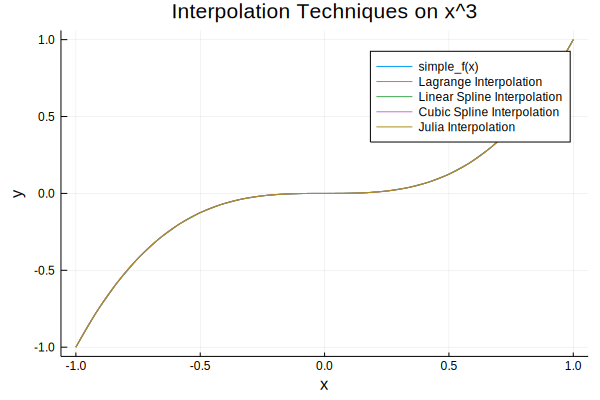

In [107]:
using Interpolations
using Plots

# We'll begin with a simple function:
# f(x) = x^3
# On the interval of [-1, 1].
N = 25
xrange = Vector(-1:0.01:1)
simple_f_lagrange(x, N) = lagrange_interpolate(x->x^3, [-1, 1], N)(x)
simple_f_linear_spline(x, N) = linear_spline_interpolate(x->x^3, [-1, 1], N)(x)
simple_f_cubic_spline(x, N) = cubic_spline_interpolate(x->x^3, [-1, 1], N)(x)
simple_f_julia_cs(x, N) = julia_interpolate(x->x^3, [-1, 1], N)(x)
plot(xrange, x->x^3, label="simple_f(x)",
     xlabel="x", ylabel="y", 
     title="Interpolation Techniques on x^3")
plot!(xrange, x->simple_f_lagrange(x, N), 
         label="Lagrange Interpolation")
plot!(xrange, x->simple_f_linear_spline(x, N), 
         label="Linear Spline Interpolation")
plot!(xrange, x->simple_f_cubic_spline(x, N), 
         label="Cubic Spline Interpolation")
plot!(xrange, x->simple_f_julia_cs(x, N),
         label="Julia Interpolation")

As we can see above, all of the techniques work pretty well on a simple function like x^3. In this case, we use 25 samples on the interval. 

In [147]:
using Interact

# For rendering in PDF.
using WebIO
WebIO.install_jupyter_nbextension()

# Now we'll examine a more complex function.
# Consider a function similar to one from problem set 4:
# f(x) = 1/(1+50*x^2)
xrange = Vector(-0.715:0.01:0.715)
complex_f(x) = 1/(1+50*x^2)
complex_f_lagrange(x, N) = lagrange_interpolate(complex_f, [-1, 1], N)(x)
complex_f_linear_spline(x, N) = linear_spline_interpolate(complex_f, [-1, 1], N)(x)
complex_f_cubic_spline(x, N) = cubic_spline_interpolate(complex_f, [-1, 1], N)(x)
complex_f_julia_cs(x, N) = julia_interpolate(complex_f, [-1, 1], N)(x)
@manipulate for N=slider(2:1:100, value=15)
    plot(xrange, x->complex_f(x), label="complex_f(x)",
         xlabel="x", ylabel="y", 
         title="Interpolation Techniques on 1/(1+50x^2)")
    plot!(xrange, x->complex_f_lagrange(x, N), 
          label="Lagrange Interpolation")
    plot!(xrange, x->complex_f_linear_spline(x, N),
          label="Linear Spline Interpolation")
    plot!(xrange, x->complex_f_cubic_spline(x, N), 
          label="Cubic Spline Interpolation") 
    plot!(xrange, x->complex_f_julia_cs(x, N),
          label="Julia Interpolation")
end

┌ Info: Installing Jupyter WebIO extension...
│   cmd = `/Users/finaris/.julia/conda/3/bin/jupyter nbextension install --user /Users/finaris/.julia/packages/WebIO/2nnB1/deps/bundles/webio-jupyter-notebook.js`
└ @ WebIO /Users/finaris/.julia/packages/WebIO/2nnB1/deps/jupyter.jl:237
Up to date: /Users/finaris/Library/Jupyter/nbextensions/webio-jupyter-notebook.js

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable <the entry point> --user
    
┌ Info: Enabling Jupyter WebIO extension...
│   cmd = `/Users/finaris/.julia/conda/3/bin/jupyter nbextension enable --user webio-jupyter-notebook`
└ @ WebIO /Users/finaris/.julia/packages/WebIO/2nnB1/deps/jupyter.jl:241
Enabling notebook extension webio-jupyter-notebook...
      - Validating: OK


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 99,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
14, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/finaris/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/finaris/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/finaris/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/finaris/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/finaris/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000011a97ba90, Task (runnable) @0x000000011a97ba90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\"

When we introduce a more complicated function like $1/(1+50x^2)$, we can see Runge's phenomenon for Lagrange interpolation. This becomes more pronounced as we increase our number of points in our sample. However, all forms of spline interpolation avoid this. Even though linear spline interpolation isn't as accurate, it still can avoid Runge's phenomenon. Our cubic spline interpolation and a native Julia interpolation are similar in terms of their approximation.

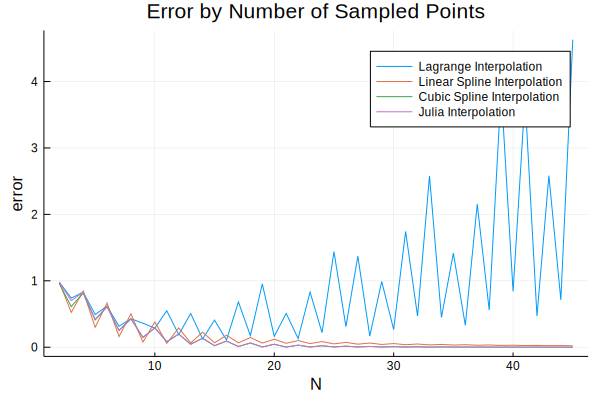

In [109]:
# The error metric we'll use is max residual on the interval.
function error(f, interpolant, N)
    return maximum([abs(f(i)-interpolant(i, N)) 
                    for i in Vector(-0.715:0.01:0.715)])
end

# Now let's examine how the error changes with the number of points.
complex_f(x) = 1/(1+50*x^2)
complex_f_lagrange(x, N) = lagrange_interpolate(complex_f, [-1, 1], N)(x)
complex_f_linear_spline(x, N) = linear_spline_interpolate(complex_f, [-1, 1], N)(x)
complex_f_cubic_spline(x, N) = cubic_spline_interpolate(complex_f, [-1, 1], N)(x)
complex_f_julia_cs(x, N) = julia_interpolate(complex_f, [-1, 1], N)(x)
xrange = Vector(2:45)
plot(xrange, N->error(complex_f, complex_f_lagrange, N),
     label="Lagrange Interpolation", xlabel="N", ylabel="error",
     title="Error by Number of Sampled Points")
plot!(xrange, N->error(complex_f, complex_f_linear_spline, N),
      label="Linear Spline Interpolation")
plot!(xrange, N->error(complex_f, complex_f_cubic_spline, N),
      label="Cubic Spline Interpolation")
plot!(xrange, N->error(complex_f, complex_f_julia_cs, N),
      label="Julia Interpolation")

Even though for small $N$ the error is similar for all of the functions in question, as $N$ increases we see Runge's phenomenon produce greater inaccuracy for Lagrange interpolation. However, spline interpolation techniques perform better as we increase our available points. Our implementation of cubic spline interpolation performs indistinguishably as well as Julia's interpolation.

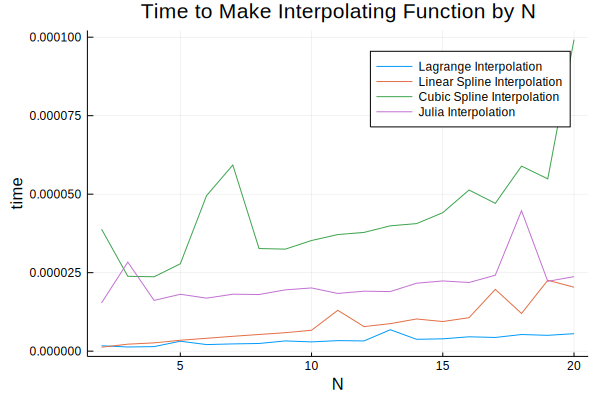

In [113]:
using BenchmarkTools

# Gets the running time of creating the function and evaluating it at a point
BenchmarkTools.DEFAULT_PARAMETERS.samples = 10
function time_interpolation_with_N(interpolant, N)
    return @belapsed $interpolant(x->x, [-1, 1], $N)
end

# Let's now examine how the running time of creating the interpolation varies
# by number of points sampled.
xrange = Vector(2:20)
plot(xrange, N->time_interpolation_with_N(lagrange_interpolate, N),
     label="Lagrange Interpolation", xlabel="N", ylabel="time",
     title="Time to Make Interpolating Function by N")
plot!(xrange, N->time_interpolation_with_N(linear_spline_interpolate, N),
      label="Linear Spline Interpolation")
plot!(xrange, N->time_interpolation_with_N(cubic_spline_interpolate, N),
      label="Cubic Spline Interpolation")
plot!(xrange, N->time_interpolation_with_N(julia_interpolate, N),
      label="Julia Interpolation")

As one might expect, the time it takes to make the functions varies depending on its complexity. Lagrange interpolation is simple to make as we re-evaluate it every time it's called. Linear spline interpolation has a straightforward construction so it doesn't take long. Julia's interpolation methods and oour cubic spline interpolation are more complex and thus take more time. The disparity between our implementation and Julia's is likely minimal with some optimizations in Julia's (in fact ours performs just as well in some cases).

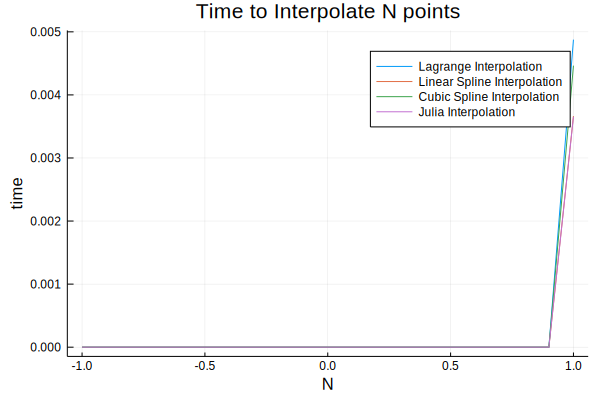

In [124]:
# Evaluates the time it takes to run the function for many points.
BenchmarkTools.DEFAULT_PARAMETERS.samples = 10
function time_for_fixed_N(f, num_points)
    return @belapsed [$f(1/i) for i=1:$num_points]
end

# Lastly, let's measure evaluation run-time for fixed N.
N = 100
timing_fixed_N_f(x) = sum([ele*x^i for (i, ele) in enumerate(randn(1000))])
timing_fixed_N_lagrange(x) = lagrange_interpolate(timing_fixed_N_f, [-1, 1], N)(x)
timing_fixed_N_linear_spline(x) = linear_spline_interpolate(timing_fixed_N_f, [-1, 1], N)(x)
timing_fixed_N_cubic_spline(x) = cubic_spline_interpolate(timing_fixed_N_f, [-1, 1], N)(x)
timing_fixed_N_julia(x) = julia_interpolate(timing_fixed_N_f, [-1, 1], N)(x)

# Evaluate for a lot of values.
xrange = Vector(-1:0.1:1)
plot(xrange, N->time_for_fixed_N(timing_fixed_N_lagrange, N),
     label="Lagrange Interpolation", xlabel="N", ylabel="time",
     title="Time to Interpolate N points")
plot!(xrange, N->time_for_fixed_N(timing_fixed_N_linear_spline, N),
      label="Linear Spline Interpolation")
plot!(xrange, N->time_for_fixed_N(timing_fixed_N_cubic_spline, N),
      label="Cubic Spline Interpolation")
plot!(xrange, N->time_for_fixed_N(timing_fixed_N_julia, N),
      label="Julia Interpolation")

The above graph suggests that for most cases, the functions are all similarly quick at extrapolating a point. However, at the end of the interval we can see more information. Lagrange interpolation takes the most to evaluate, followed by cubic spline and then linear. Julia's is the least expensive. 

# Numerical Analysis of Error

The error of methods implemented follow with what we would expect from our theoretical analysis. The most error prone is Lagrange interpolation, which grows linearly initially but eventually grows as time goes on if Runge's phenomenon is present. Linear spline interpolation follows suit, with its error decreasing quadratically. The most performant are cubic spline and Julia's spline interpolation which are similar and have an error which decreases at a rate of $O(h^4)$ as predicted. Below we show graphs of the error on functions with and without Runge's phenomenon to demonstrate.

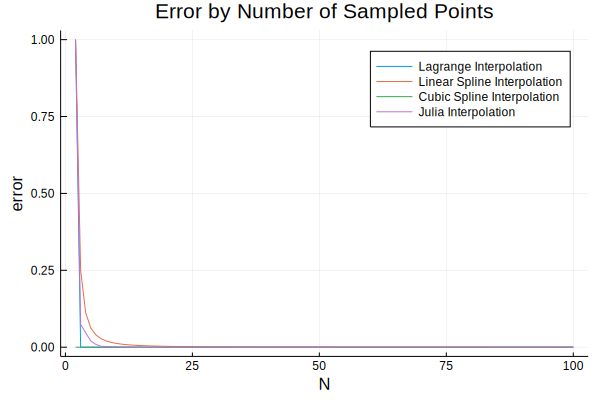

In [131]:
# Without Runge's phenomenon.
no_runge_f(x) = x^2
no_runge_f_lagrange(x, N) = lagrange_interpolate(no_runge_f, [-1, 1], N)(x)
no_runge_f_linear_spline(x, N) = linear_spline_interpolate(no_runge_f, [-1, 1], N)(x)
no_runge_f_cubic_spline(x, N) = cubic_spline_interpolate(no_runge_f, [-1, 1], N)(x)
no_runge_f_julia_cs(x, N) = julia_interpolate(no_runge_f, [-1, 1], N)(x)
xrange = Vector(2:100)
plot(xrange, N->error(no_runge_f, no_runge_f_lagrange, N),
     label="Lagrange Interpolation", xlabel="N", ylabel="error",
     title="Error by Number of Sampled Points")
plot!(xrange, N->error(no_runge_f, no_runge_f_linear_spline, N),
      label="Linear Spline Interpolation")
plot!(xrange, N->error(no_runge_f, no_runge_f_cubic_spline, N),
      label="Cubic Spline Interpolation")
plot!(xrange, N->error(no_runge_f, no_runge_f_julia_cs, N),
      label="Julia Interpolation")

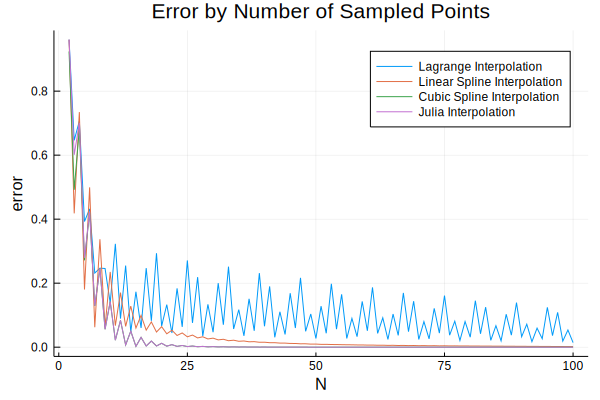

In [130]:
# With Runge's phenomenon.
runge_f(x) = 1/(1+25*x^2)
runge_f_lagrange(x, N) = lagrange_interpolate(runge_f, [-1, 1], N)(x)
runge_f_linear_spline(x, N) = linear_spline_interpolate(runge_f, [-1, 1], N)(x)
runge_f_cubic_spline(x, N) = cubic_spline_interpolate(runge_f, [-1, 1], N)(x)
runge_f_julia_cs(x, N) = julia_interpolate(runge_f, [-1, 1], N)(x)
xrange = Vector(2:100)
plot(xrange, N->error(runge_f, runge_f_lagrange, N),
     label="Lagrange Interpolation", xlabel="N", ylabel="error",
     title="Error by Number of Sampled Points")
plot!(xrange, N->error(runge_f, runge_f_linear_spline, N),
      label="Linear Spline Interpolation")
plot!(xrange, N->error(runge_f, runge_f_cubic_spline, N),
      label="Cubic Spline Interpolation")
plot!(xrange, N->error(runge_f, runge_f_julia_cs, N),
      label="Julia Interpolation")

In the above graphs we can see the errors stabilize very quickly with functions that do not demonstrate Runge's phenomenon. With Runge's phenomenon, the errors converge much more slowly with Lagrange interpolation never having a stabilizing error. The errors once again align with expectation with Lagrange being the slowest, followed by linear spline and then indistinguishably cubic spline and Julia. Out of curiosity, we will also examine the error differences between our cubic spline interpolation and Julia's.

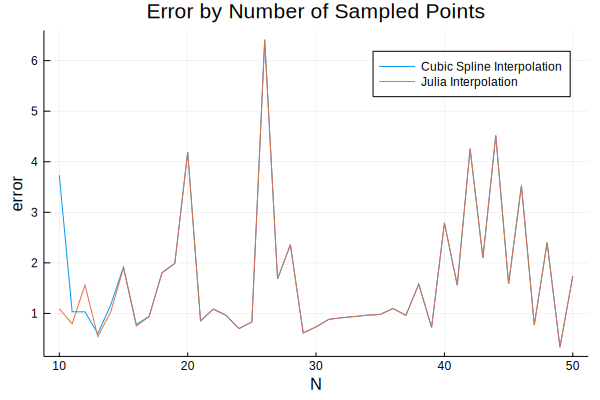

In [140]:
ourjl_f(x) = x*sin(2x+π/4)+1
ourjl_f_cubic_spline(x, N) = cubic_spline_interpolate(ourjl_f, [-100, 100], N)(x)
ourjl_f_julia_cs(x, N) = julia_interpolate(ourjl_f, [-100, 100], N)(x)
xrange = Vector(10:50)
plot(xrange, N->error(ourjl_f, ourjl_f_cubic_spline, N),
     label="Cubic Spline Interpolation", xlabel="N", ylabel="error",
     title="Error by Number of Sampled Points")
plot!(xrange, N->error(ourjl_f, ourjl_f_julia_cs, N),
      label="Julia Interpolation")

Though our implementation initially does worse, it takes very little values (around 10) for them to perform very similarly (almost the same). Perhaps this comes with how the beginning and ends of the interval are handled, and could indicate that minor modifications to our implementation would match the built-in one. That said, the differences are negligible and overall the error compared to the initial function is very small.

In summary, our numerical results of the error align with our analytical expectations. Lagrange interpolation converges the slowest ($O(h)$) and can actually diverge under Runge's phenomenon. Linear spline interpolation performs better ($O(h^2)$), but does not perform as well as cubic spline interpolation ($O(h^4)$). Our cubic spline interpolation performs essentially just as well as Julia's interpolation package, suggesting that it is also $O(h^4)$, an upper bound on error convergence for interpolation methods used in practice.

# Numerical Analysis of Running Time

### Theoretical Bounds

Before we examine the running time numerically, we will quickly discuss the theoretical runtimes of the above interpolation methods. 

Linear spline interpolation is $O(n)$ to create and $O(n)$ to evaluate. We must create $O(n)$ functions given $n$ points to compose $q(x)$, and each function takes $O(1)$ time to create (as we do a simple computation). The evaluation is linear as we need to determine which function to use which can take $O(n)$ time (with optimizations we can make this $O(\log n)$ by binary searching the interval and even $O(1)$ in some structures by properly bucketing the input point with $O(1)$ cost). 

Cubic spline interpolation is $O(n)$ to evaluate for the same reason as above (and can be optimized in a similar fashion as linear spline interpolation). Cubic splines take $O(n^2)$ time to interpolate, as we perform an $O(n^2)$ computation to get the $M$ values and thus the $c_i$ and $d_i$ values in $q_{i}(x)$ (from solving the linear system). From there it is another $O(n)$ cost to build the functions, but this is dominated by the $O(n^2)$ linear system solve

Finally, the running time of extraploating in Lagrange interpolation is $O(n^2)$. As we call the Lagrange cardinal function for every point (which has a run-time of $O(n)$ due to $n$ multiplications), and there are $n$ points, the overall run-time is $n\cdot O(n)=O(n^2)$. The time to make the function is negligible as there is no function that generalizes to all points. The interpolation must be made per point.

### Numerical Analysis

From the graphs above, we can see that the run-times essentially align with the theoretical bounds. The time to make the interpolation functions for cubic splines and Julia's splines are the most (with Julia's being slightly less due to the optimizations listed above and others not mentioned). Lagrange interpolation is trivial to make, so it is the lowest below linear spline interpolation. We reconfirm this below.

In [121]:
N = 50
println("Lagrange Interpolation: 
        $(time_interpolation_with_N(lagrange_interpolate, N))")
println("Linear Spline Interpolation: 
        $(time_interpolation_with_N(linear_spline_interpolate, N))")
println("Cubic Spline Interpolation: 
        $(time_interpolation_with_N(cubic_spline_interpolate, N))")
println("Julia Interpolation: 
        $(time_interpolation_with_N(julia_interpolate, N))")

Lagrange Interpolation: 
        1.2837e-5
Linear Spline Interpolation: 
        3.3712e-5
Cubic Spline Interpolation: 
        0.000188819
Julia Interpolation: 
        4.0058e-5


Essentially, the larger the spline is the more costly it is to make the interpolating function. The graphs in the previous section and the simple test above demonstrate that all of these take time which scales linearly with the input with the exception of Lagrange which is sublinear and Julia which is quadratic. The time it takes to evaluate the interpolating function is also wonderfully demonstrated (which we will again reconfirm below). Lagrange interpolation takes the most as it scales quadratically with its input, and the remaining functions are either linear or sublinear in their extrapolation time.

In [125]:
N = 200
timing_fixed_N_f_2(x) = sum([ele*x^i for (i, ele) in enumerate(randn(1000))])
timing_fixed_N_lagrange_2(x) = lagrange_interpolate(timing_fixed_N_f_2, [-1, 1], N)(x)
timing_fixed_N_linear_spline_2(x) = linear_spline_interpolate(timing_fixed_N_f_2, [-1, 1], N)(x)
timing_fixed_N_cubic_spline_2(x) = cubic_spline_interpolate(timing_fixed_N_f_2, [-1, 1], N)(x)
timing_fixed_N_julia_2(x) = julia_interpolate(timing_fixed_N_f_2, [-1, 1], N)(x)
println("Lagrange Interpolation: 
        $(time_for_fixed_N(timing_fixed_N_lagrange_2, N))")
println("Linear Spline Interpolation: 
        $(time_for_fixed_N(timing_fixed_N_linear_spline_2, N))")
println("Cubic Spline Interpolation: 
        $(time_for_fixed_N(timing_fixed_N_cubic_spline_2, N))")
println("Julia Interpolation: 
        $(time_for_fixed_N(timing_fixed_N_julia_2, N))")

Lagrange Interpolation: 
        2.768559066
Linear Spline Interpolation: 
        1.795492824
Cubic Spline Interpolation: 
        2.340824269
Julia Interpolation: 
        2.09604931


Once again, as in the graphs above, we see that to evaluate a complex function Lagrange interpolation takes a significantly longer amount of time than the other techniques. Julia's spline interpolation takes longer than linear splines (which is the fastest), but is a bit faster than our spline interpolation (likely if we make $O(\log n)$ evaluation with binary search or a heap, the two will be considerably close).

# Applications

In general, spline methods are applicable to a number of fields. One can assume that any scenario in which interpolation methods are useful, spline methods can shine.

The most obvious applications of spline methods are in curve fitting problems. If we are given an arbitrary set of points, then finding a function which fits the curve (mainly so that we can fit other data points) can be done with spline methods. Furthermore, approximation theory relies on finding and evaluating the effectiveness the performance of an interpolated function relative to some predetermined class; spline methods find a natural fit in this field.

Splines are often seen in computer graphics and computer-aided design. Splines allow for the simple, efficient, and accurate evaluation of complex shapes from a pre-determined set of control points. Different kinds of splines apply in different contexts, and can be used to even solve PDEs by creating a finite difference scheme with B-splines. Signal processing also benefits greatly from interpolation techniques such as spline interpolation.

# Additional Topics

There are a number of spline interpolation methods that exist. Shown above is only a small subset. One can extend spline interpolation to an arbitrary polynomial fit. For example, linear and quadratic spline techniques exist. Furthermore, quartic, cubic, and greater degree polynomial fits exist for each segment of a spline interpolation. Cubic splines tend to be the best compromise in terms of complexity of the interpolation and accuracy of the technique. However, different interpolation techniques have differing advantages, as seen above. 

Different representations exist for polynomial techniques such as Hermite form (Ahlberg, 1986). Higher dimension spline interpolation also exists. Different numbers of control points may also be used by different techniques such as the centripetal Catmull-Rom spline. In certain applications, different models are used to exploit different advantages. In computer graphics, NURBS (Non-uniform rational B-splines) are a type of B-spline which offer greater flexibility and are more performant and higher-dimensional than typical B-splines). 

Lastly, there are a number of different interpolation techniques. In this project we explore a subset of spline techniques compared to Lagrange interpolation, but other interpolation methods have different advantages. Gaussian interpolation techniques, for example, work particularly well for noisy data. Other techniques such as Whittaker-Shannon interpolation work well with infinite data. Some techniques allow for interpolation of not only data but its derivative as well. Many applications of interpolation and spline problems offer a number of interesting topics that coincide with the methods discussed here.

# Conclusion

Spline techniques are a strong compromise between costly polynomial techniques and inaccurate linear techniques. Furthermore, spline interpolation methods avoid issues such as Runge's phenomenon. In our examination above, we find that spline interpolation methods with higher complexity have significantly lower error than lower degree spline methods and polynomial methods like Lagrange interpolation. Though the cost of creating the spline method is more costly upfront, even low degree spline methods have better error than polynomial methods. Lastly, we found that the cost of evaluating (or extrapolating) values with the interpolation is less costly with spline methods, making them an optimal choice when one is extrapolating a number of points. This is coupled with the fact that a change in one of the control points of an interpolation method results in the same run-time for Lagrange interpolation, but for spline methods we can still perform an $O(1)$ update on one or two of the polynomials and preserver our linear to sublinear evaluation runtime.

Ultimately, our analysis revealed that cubic B-splines are among the most accurate interpolation methods, and the runtime of creating them and using them is not too different than weaker polynomial and linear methods. In fact, evaluation of splines on new points tends to be faster than other techniques.

# References

1. Ahlberg, J. H., Nilson, E. N., & Walsh, J. L. (1986). The theory of splines and their applications. Orlando u.a.
2. Epperson (1998). “History of Splines”. In:url:https://www.netlib.org/na-digest-html/98/v98n26.html#1.
3. Harvey Mudd College. (2019). Cubic Spline Interpolation. Retrieved from http://fourier.eng.hmc.edu/e176/lectures/ch7/node6.html
4. Hazewinkel, Michiel (2001). “Spline Interpolation”.In:url:https://www.encyclopediaofmath.org/index.php/Spline_interpolation.
5. Kress, Rainer (1998). “Numerical Analysis”. In:url:https://archive.org/details/springer_10.1007-978-1-4612-0599-9/mode/2up.